# Libraries

In [483]:
# all libraries in from PP1
#for train classifier, remove the Algorithms we're not looking for
#look for f1_score and make_score metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier [surely they do mention it]
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns



# 2.1 Import Data

In [513]:
meds = pd.read_csv("medicine.csv")

In [ ]:
# average age of thosse with low blood pressure
#col 1(AGE) col 2(Blood Pressure)
avg_age = 

# 2.2 inspect

In [485]:
meds.head(20)

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
0,23,Female,High,High,25.355,meds5
1,47,Male,Low,High,13.093,meds3
2,47,Male,Low,High,10.114,meds3
3,28,Female,Normal,High,7.798,meds4
4,61,Female,Low,High,18.043,meds5
5,22,Female,Normal,High,8.607,meds4
6,49,Female,Normal,High,16.275,meds5
7,41,Male,Low,High,11.037,meds3
8,60,Male,Normal,High,15.171,meds5
9,43,Male,Low,Normal,19.368,meds5


In [486]:
meds.describe(include="all")

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,Male,High,High,NaN,meds5
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [487]:
meds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Gender         200 non-null    object 
 2   Blood_Presure  200 non-null    object 
 3   Cholesterol    200 non-null    object 
 4   Ratio_Na_K     200 non-null    float64
 5   Medication     200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [488]:
meds.isnull().sum()

Age              0
Gender           0
Blood_Presure    0
Cholesterol      0
Ratio_Na_K       0
Medication       0
dtype: int64

# 2.3 Visualise

<AxesSubplot:xlabel='Medication', ylabel='Ratio_Na_K'>

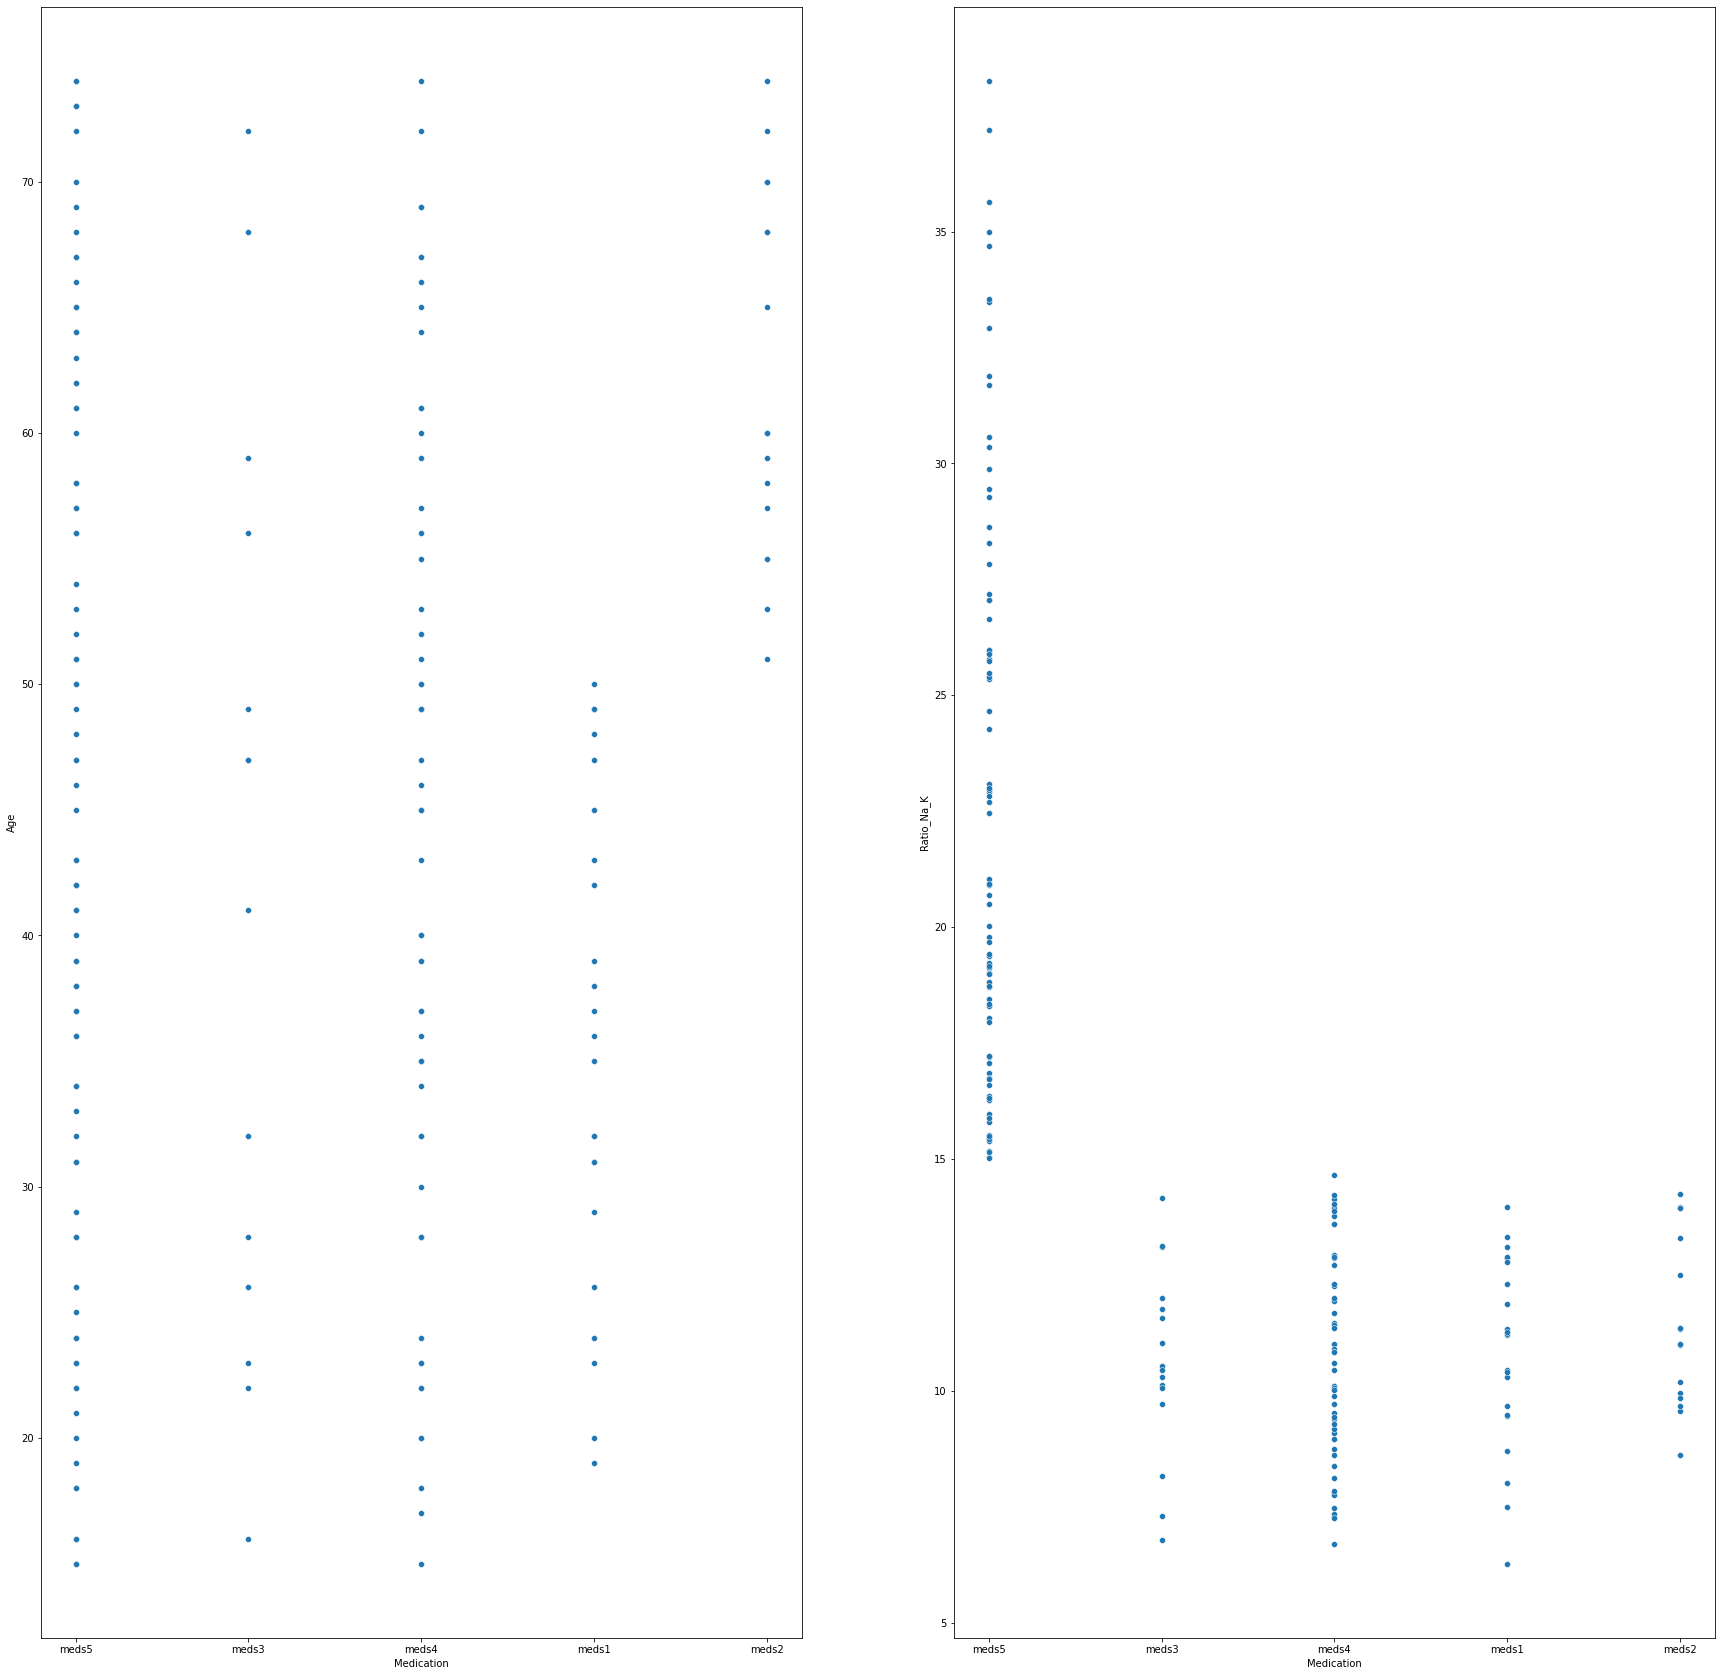

In [489]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 30))
sns.scatterplot(data = meds, x = "Medication", y = "Age", ax = axes[0])
sns.scatterplot(data = meds, x = "Medication", y = "Ratio_Na_K", ax = axes[1])

# 2.4 Deduce from above

In [490]:
print("med 5 and 4 seem to have successfully treated people in most age groups with a good spread, med 3 seemingly worked in many age groups but worked on a low number of people, med 1 worked on age groups approximately younger than 50 and med 2 seemingly being effective in those older than 50.")
print("However, med 5 seems to have only successfully treated people with Ratio_Na_K higher than 15 while all the others were were    effective for those with a ratio less than 15.")

med 5 and 4 seem to have successfully treated people in most age groups with a good spread, med 3 seemingly worked in many age groups but worked on a low number of people, med 1 worked on age groups approximately younger than 50 and med 2 seemingly being effective in those older than 50.
However, med 5 seems to have only successfully treated people with Ratio_Na_K higher than 15 while all the others were were    effective for those with a ratio less than 15.


# 2.5 Determine and display the number of records relevant to each medication

In [491]:
#Unique value In the dependent and count , num of each unique category
meds.groupby("Medication").size()

Medication
meds1    23
meds2    16
meds3    16
meds4    54
meds5    91
dtype: int64

# 2.6 Determine whether the data is balanced

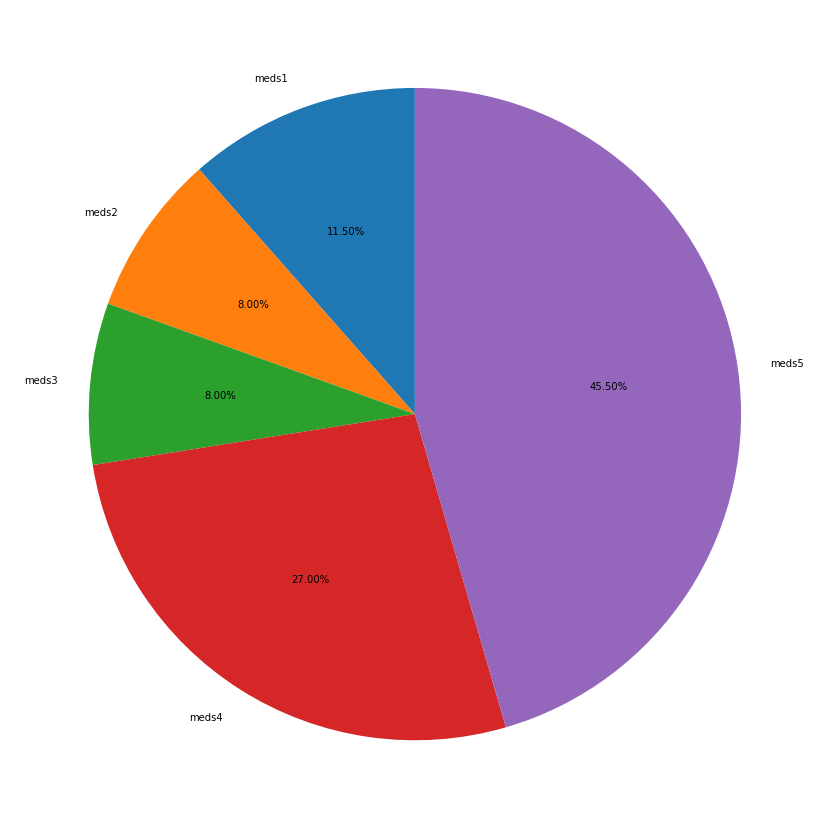

In [492]:
plt.figure(figsize=(15,15))
plt.pie(meds.groupby("Medication").size(), autopct ='%.2f%%', labels= meds.groupby("Medication").indices,startangle=90)
plt.show()

# 2.7 Perform the necessary operations to balance the data

In [493]:
meds_resampled = meds.groupby("Medication").sample(n=91, replace = True, random_state=77)
meds_resampled

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
176,48,Male,High,Normal,10.446,meds1
176,48,Male,High,Normal,10.446,meds1
118,32,Female,High,Normal,10.292,meds1
76,36,Female,High,High,11.198,meds1
17,43,Male,High,High,13.972,meds1
...,...,...,...,...,...,...
123,36,Female,Normal,High,16.753,meds5
126,66,Male,High,High,16.347,meds5
87,69,Male,Low,High,15.478,meds5
73,41,Female,Normal,Normal,22.905,meds5


# 2.8 Confirm the successful resampling of the data

In [494]:
meds_resampled.groupby("Medication").size()

Medication
meds1    91
meds2    91
meds3    91
meds4    91
meds5    91
dtype: int64

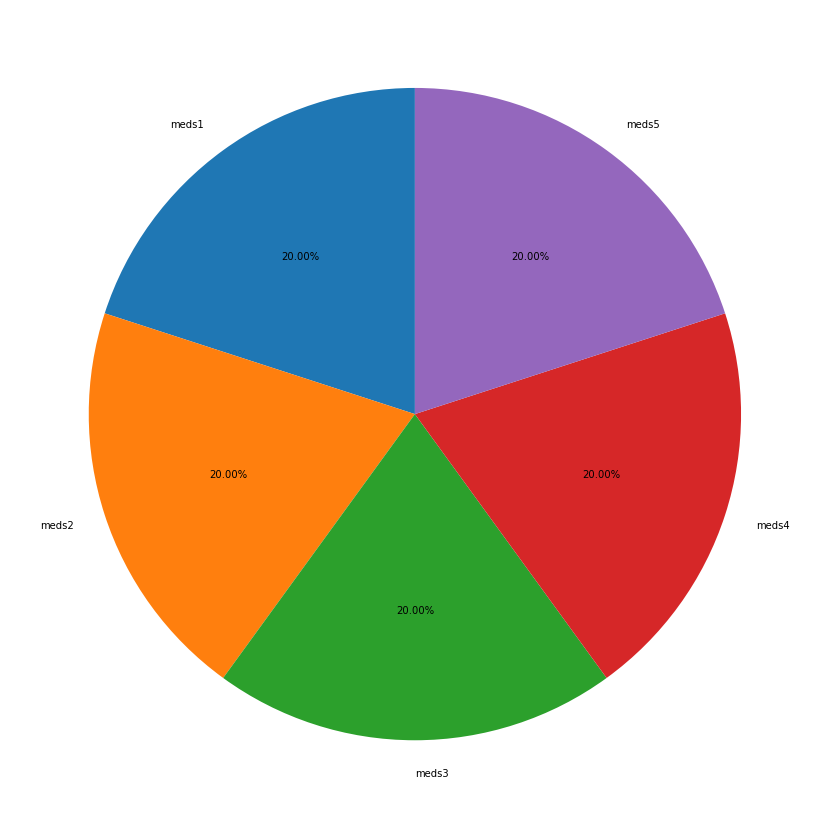

In [495]:
plt.figure(figsize=(15,15))
plt.pie(meds_resampled.groupby("Medication").size(), autopct ='%.2f%%', labels= meds_resampled.groupby("Medication").indices,startangle=90)
plt.show()

# 2.9 Convert the text values in the dataframe to numeric values

# from balnced data we are now using that

In [496]:
#since its little columns then check fror unique values
print(f"Gender: {meds_resampled['Gender'].unique()}\n")
print(f"Blood_Presure : {meds_resampled['Blood_Presure'].unique()}\n")
print(f"Cholesterol: {meds_resampled['Cholesterol'].unique()}\n")
print(f"Medication: {meds_resampled['Medication'].unique()}\n")

Gender: ['Male' 'Female']

Blood_Presure : ['High' 'Low' 'Normal']

Cholesterol: ['Normal' 'High']

Medication: ['meds1' 'meds2' 'meds3' 'meds4' 'meds5']



In [497]:
label_encoder = LabelEncoder()

meds_resampled['Gender'] = label_encoder.fit_transform(meds_resampled['Gender'])
meds_resampled['Blood_Presure'] = label_encoder.fit_transform(meds_resampled['Blood_Presure'])
meds_resampled['Cholesterol'] = label_encoder.fit_transform(meds_resampled['Cholesterol'])
meds_resampled['Medication'] = label_encoder.fit_transform(meds_resampled['Medication'])

meds_resampled.head(20)

,Age,Gender,Blood_Presure,Cholesterol,Ratio_Na_K,Medication
176,48,1,0,1,10.446,0
176,48,1,0,1,10.446,0
118,32,0,0,1,10.292,0
76,36,0,0,0,11.198,0
17,43,1,0,0,13.972,0
83,38,0,0,1,11.326,0
187,47,1,0,0,10.403,0
137,35,0,0,0,12.894,0
174,42,1,0,1,12.766,0
17,43,1,0,0,13.972,0


# 2.10 Confirm that there are no more columns of type object.

In [498]:
meds_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 176 to 21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            455 non-null    int64  
 1   Gender         455 non-null    int32  
 2   Blood_Presure  455 non-null    int32  
 3   Cholesterol    455 non-null    int32  
 4   Ratio_Na_K     455 non-null    float64
 5   Medication     455 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 17.8 KB


In [499]:
print(f"Gender: {meds_resampled['Gender'].unique()}\n")
print(f"Blood_Presure : {meds_resampled['Blood_Presure'].unique()}\n")
print(f"Cholesterol: {meds_resampled['Cholesterol'].unique()}\n")
print(f"Medication: {meds_resampled['Medication'].unique()}\n")

Gender: [1 0]

Blood_Presure : [0 1 2]

Cholesterol: [1 0]

Medication: [0 1 2 3 4]



# 2.11 Determine the correlation between Medication and the other data columns

In [500]:
corr = meds_resampled.corr()
corr = corr[['Medication']]
corr

,Medication
Age,-0.062474
Gender,-0.059231
Blood_Presure,0.652708
Cholesterol,0.031694
Ratio_Na_K,0.546378
Medication,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation')

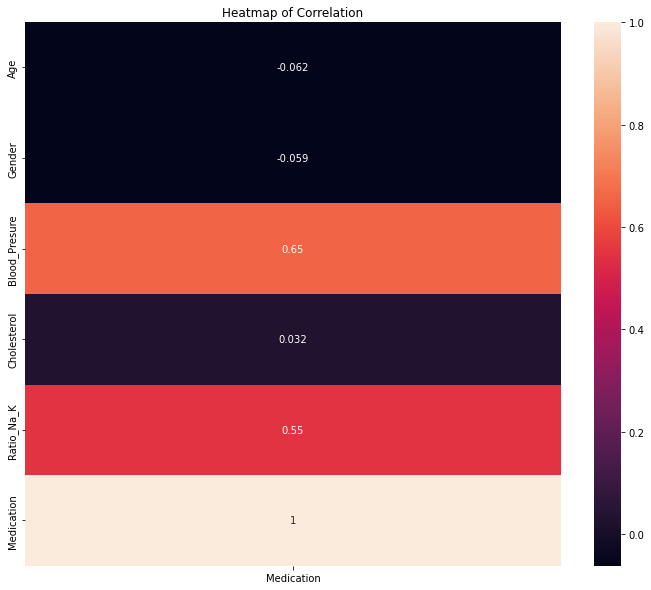

In [501]:
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True)
plt.title('Heatmap of Correlation')

# 2.12  What can be deduced from the correlation values

In [514]:
print("Age and gender have a very weak negative correlation with medication and Cholesterol has a weak positive correlation with\nmedication, so they have almost no influence.")
print("")
print("Blood Pressure and Ratio_Na_K have strong positive correlations with Ratio_Na_K having the strongest correlation, therefore\nthey both strongly proportionate with medication, so increase in them equals an increase in succesive medication. According to the heatmap")
print("")


Age and gender have a very weak negative correlation with medication and Cholesterol has a weak positive correlation with
medication, so they have almost no influence.

Blood Pressure and Ratio_Na_K have strong positive correlations with Ratio_Na_K having the strongest correlation, therefore
they both strongly proportionate with medication, so increase in them equals an increase in succesive medication. According to the heatmap



# 2.13 Define X and y and create a training / testing dataset of 80% / 20%

In [515]:
y = meds_resampled['Medication']
X = meds_resampled.drop('Medication', axis=1)
print(X.shape)
print(y.shape)

(455, 5)
(455,)


In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 76)

print("Dim x train:",X_train.shape)
print("Dim y train:",y_train.shape)
print("Dim x test:",X_test.shape)
print("Dim y test:",y_test.shape)

Dim x train: (364, 5)
Dim y train: (364,)
Dim x test: (91, 5)
Dim y test: (91,)


<AxesSubplot:>

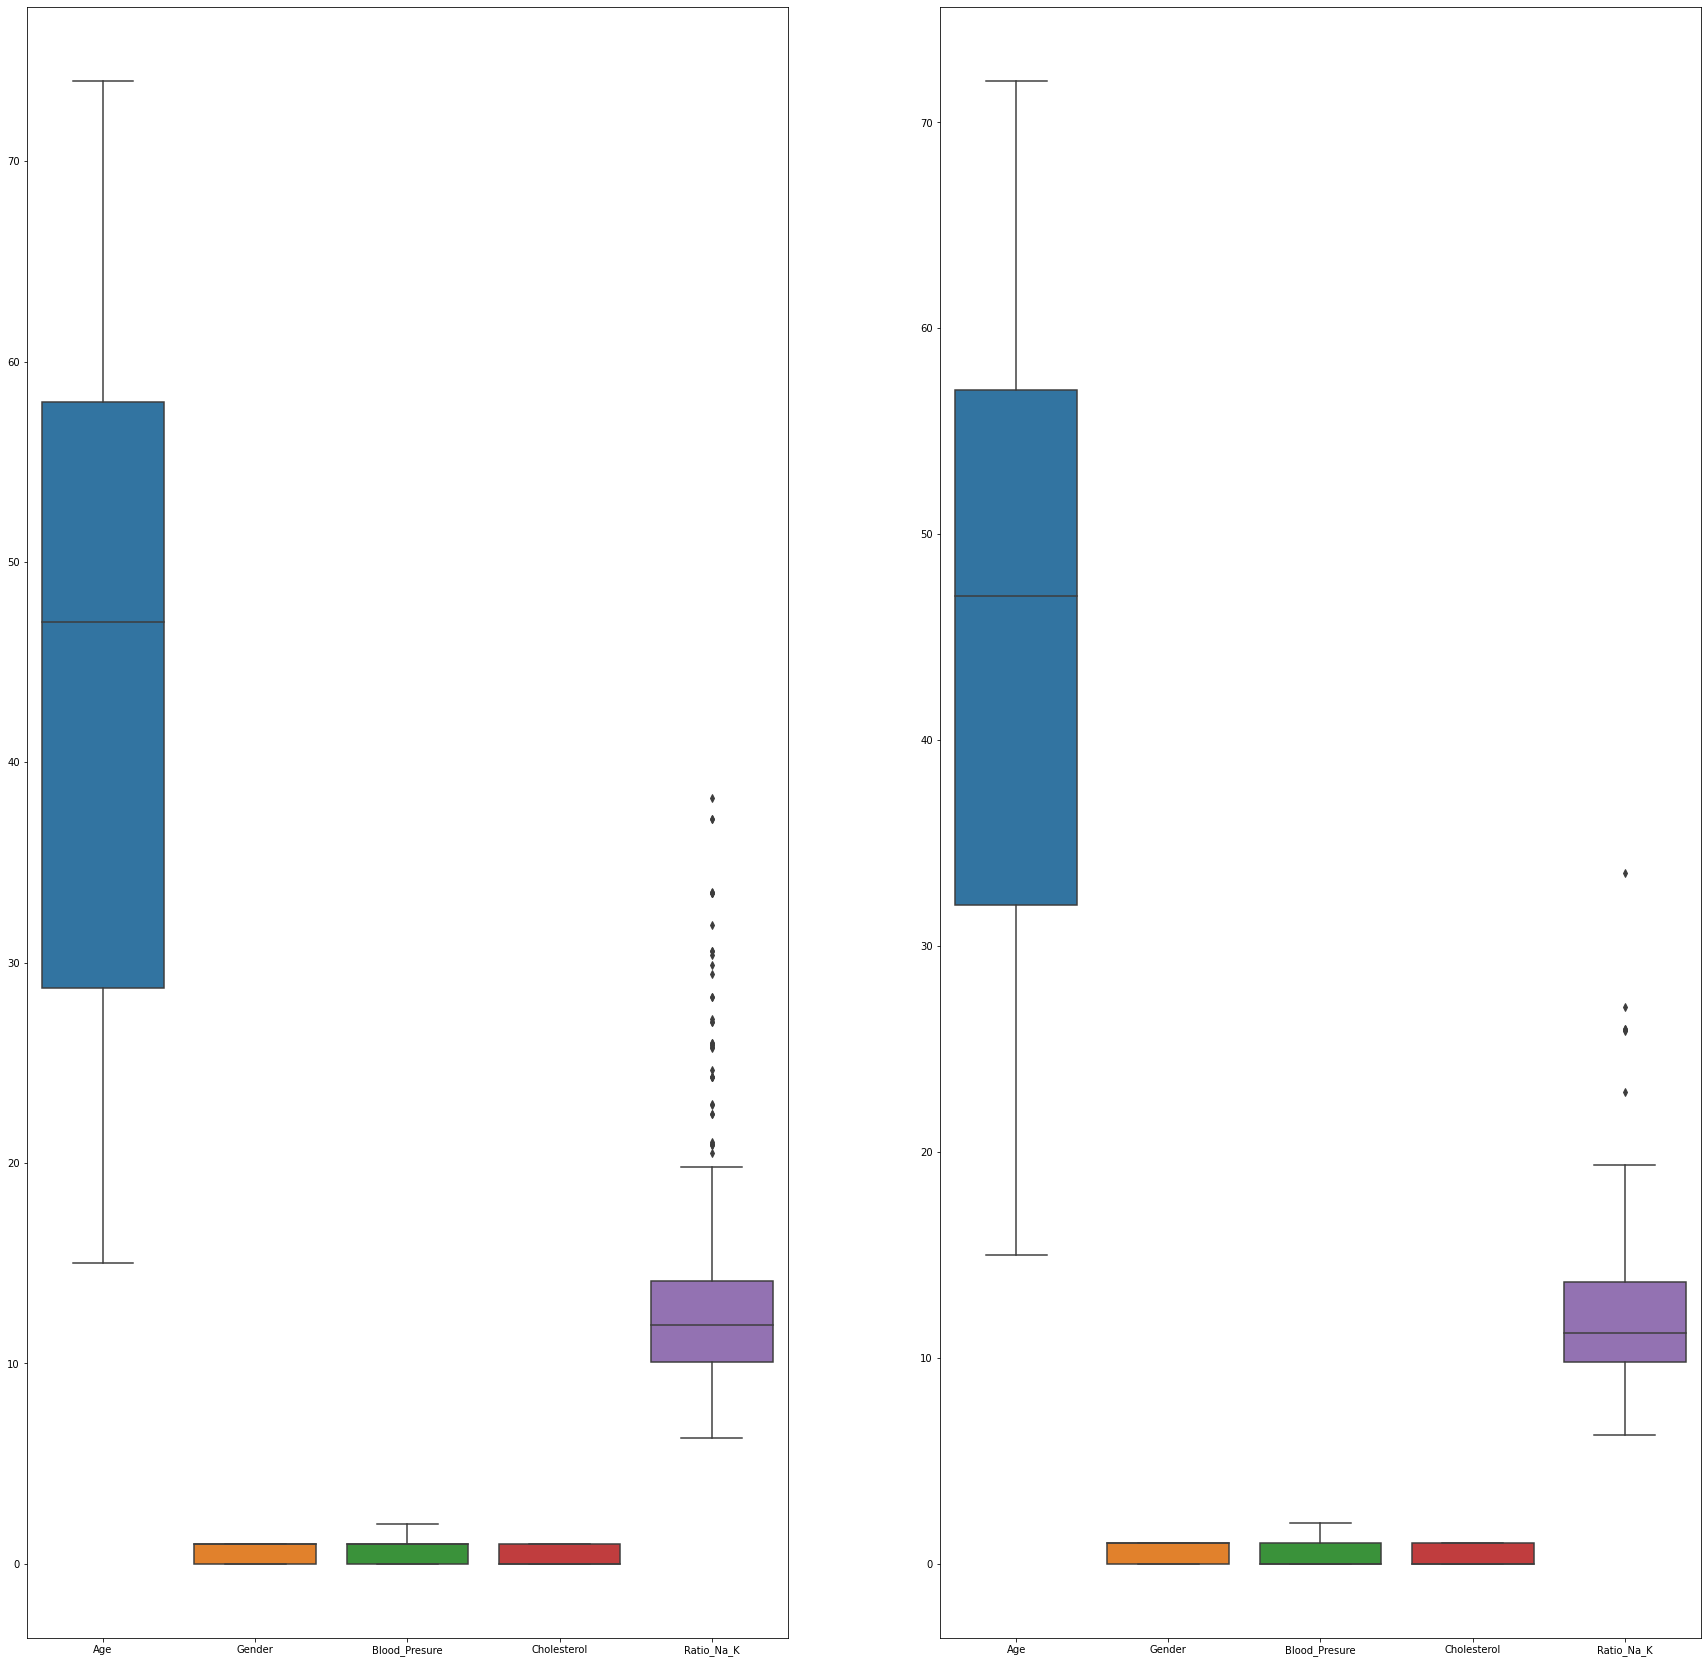

In [505]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 30))
sns.boxplot(data= X_train,  ax = axes[0])
sns.boxplot(data = X_test,  ax = axes[1])

In [506]:

X_train = stats.zscore(X_train) 
X_test = stats.zscore(X_test) 



<AxesSubplot:>

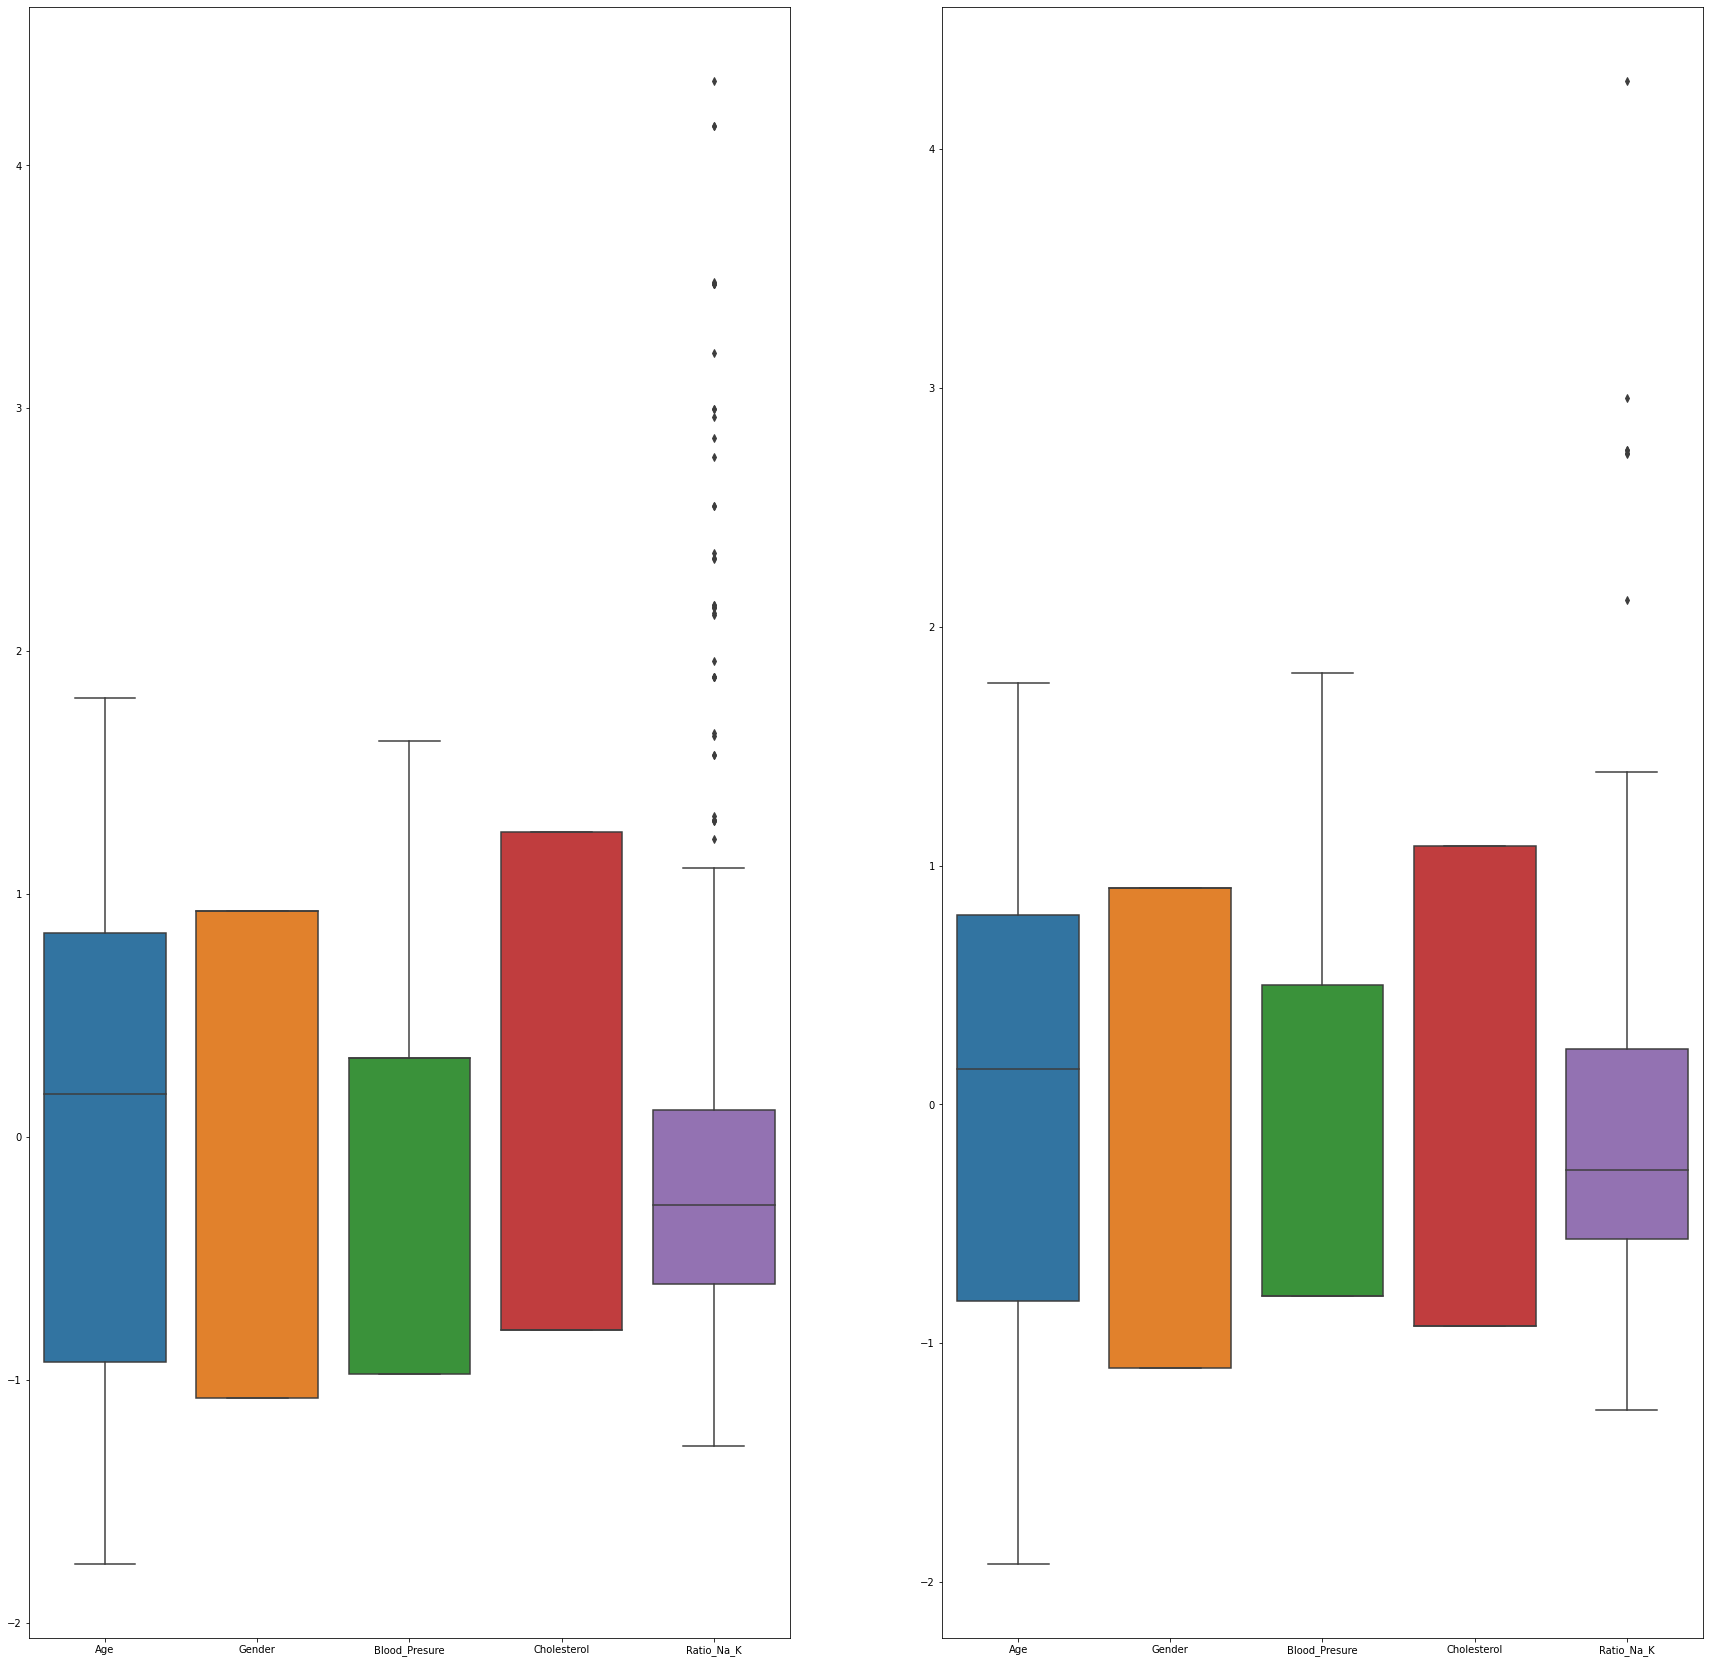

In [507]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 30))
sns.boxplot(data= X_train,  ax = axes[0])
sns.boxplot(data = X_test,  ax = axes[1])

# 2.14 Train the following classifiers and determine the best model by using k-fold cross-validation

In [508]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestRegressor(n_estimators = 5, random_state = 77)))

#testing models

results = []
names = []
f1 = make_scorer(f1_score, average='weighted')
for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 77, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = f1)
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN(acc): 0.920205 (0.036559)
KNN(f1): 0.915421 (0.039877)
CART(acc): 1.000000 (0.000000)
CART(f1): 1.000000 (0.000000)
RF(acc): 1.000000 (0.000000)
RF(f1): 1.000000 (0.000000)


# 2.15 Select the model that produced the highest F1 score

In [509]:
#diddnt show all
#they wanted only for the high f1
#we have two high f1 thus choose any
#if it had parameter from inserting to the list of mosels, then you should include those parameters
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [510]:
print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9120879120879121
[[28  0  0  0  1]
 [ 0 16  0  0  2]
 [ 0  0 13  0  0]
 [ 0  0  0 10  5]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        13
           3       1.00      0.67      0.80        15
           4       0.67      1.00      0.80        16

    accuracy                           0.91        91
   macro avg       0.93      0.90      0.90        91
weighted avg       0.94      0.91      0.91        91



# 2.16 Discuss the selected model’s metrics and scores

In [519]:
print("Its training accuracy(1.00) is higher than its testing accuracy(0.91) however 0.91 is still very high accuracy")

Its training accuracy(1.00) is higher than its testing accuracy(0.91) however 0.91 is still very high accuracy


In [512]:

print("Precision: Ratio of correct predicted true positives over all positive predicted observations(TruePositives+FalsePositives);\n therefore higher the precision the lower the false positives")
print("Recall: Ratio of correct predicted true positives over all actual positive observations(TruePositives+FalseNegatives);\n therefore higher the recall the lower the false positives")
print("F1 is the weighted average of precision and recall and therefore takes into account the weight of the false positives and false negatives")

Precision: Ratio of correct predicted true positives over all positive predicted observations(TruePositives+FalsePositives);
 therefore higher the precision the lower the false positives
Recall: Ratio of correct predicted true positives over all actual positive observations(TruePositives+FalseNegatives);
 therefore higher the recall the lower the false positives
F1 is the weighted average of precision and recall and therefore takes into account the weight of the false positives and false negatives
